In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR, RandomForestRegressor as RFR
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_train = pd.read_excel('datasets/Project_17_Flight_Ticket_Price_Train.xlsx')
data_test = pd.read_excel('datasets/Project_17_Flight_Ticket_Price_Test.xlsx')

In [3]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
print("Shape of train dataset", data_train.shape)
print("Shape of test dataset", data_test.shape)

Shape of train dataset (10683, 11)
Shape of test dataset (2671, 10)


In [6]:
#Checking for null values in train dataset

data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As we can see, two columns are having 1 null value each 

In [7]:
#Checking null value of Total Stops

data_train[data_train['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
#Checking null value of Route

data_train[data_train['Route'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


As it is single row with null value either we can drop it or can replace null value with most frequent value

In [9]:
data_train.shape

(10683, 11)

In [10]:
#drop null column values
data_train.dropna(inplace=True)

In [11]:
data_train.shape

(10682, 11)

In [12]:
#Checking for null values in test dataset

data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values are present in test dataset

In [13]:
#lets check the unique values in Airline
data_train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

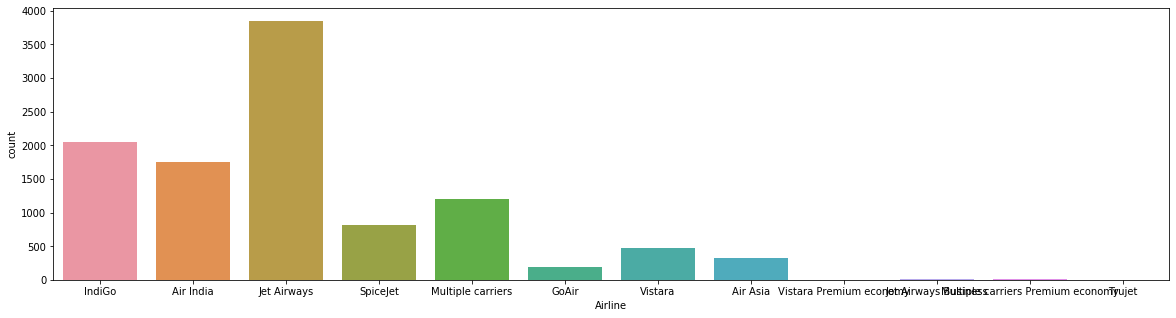

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x='Airline',data=data_train)
plt.show()

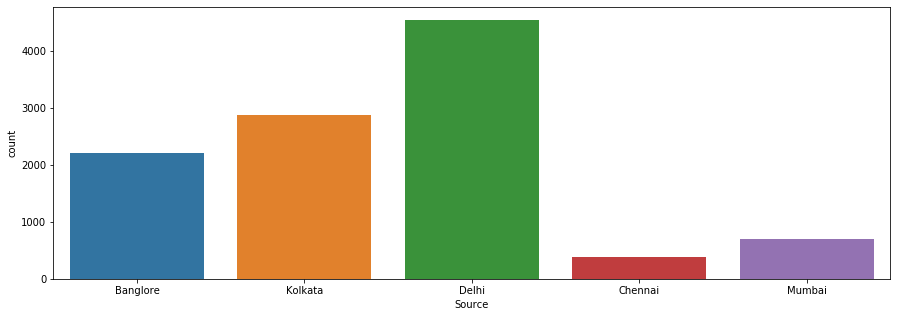

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='Source',data=data_train)
plt.show()

Most of the flight source is Delhi

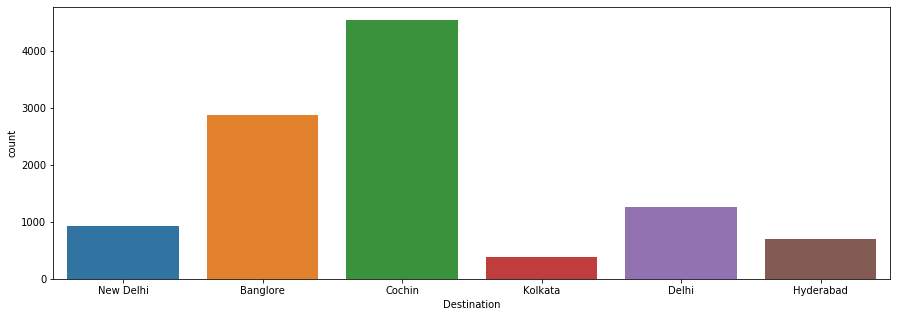

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Destination',data=data_train)
plt.show()

Most of the flight destination is Cochin

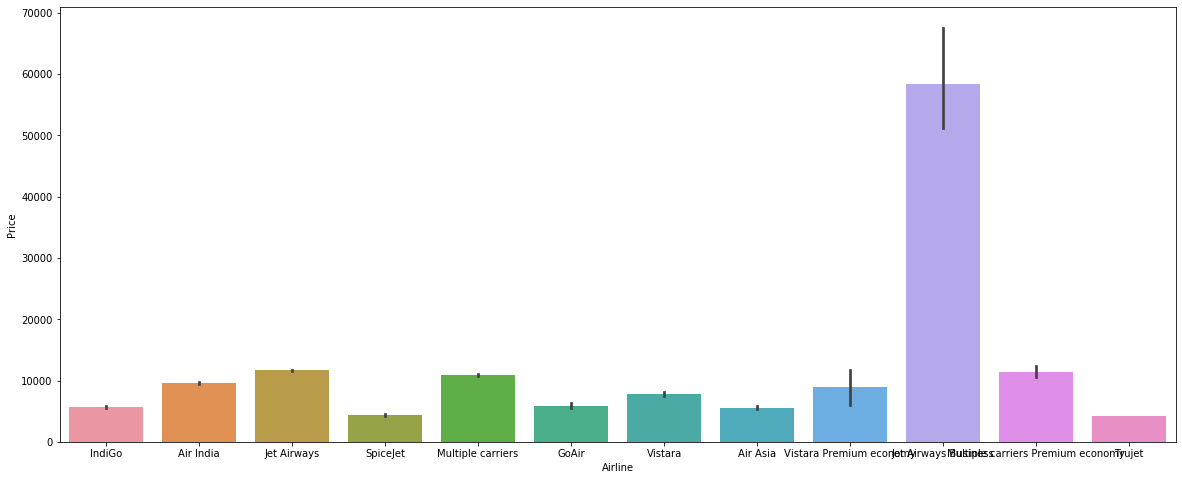

In [17]:
#checking average price with Airline
plt.figure(figsize=(20,8))
sns.barplot(x='Airline',y='Price',data=data_train)
plt.show()

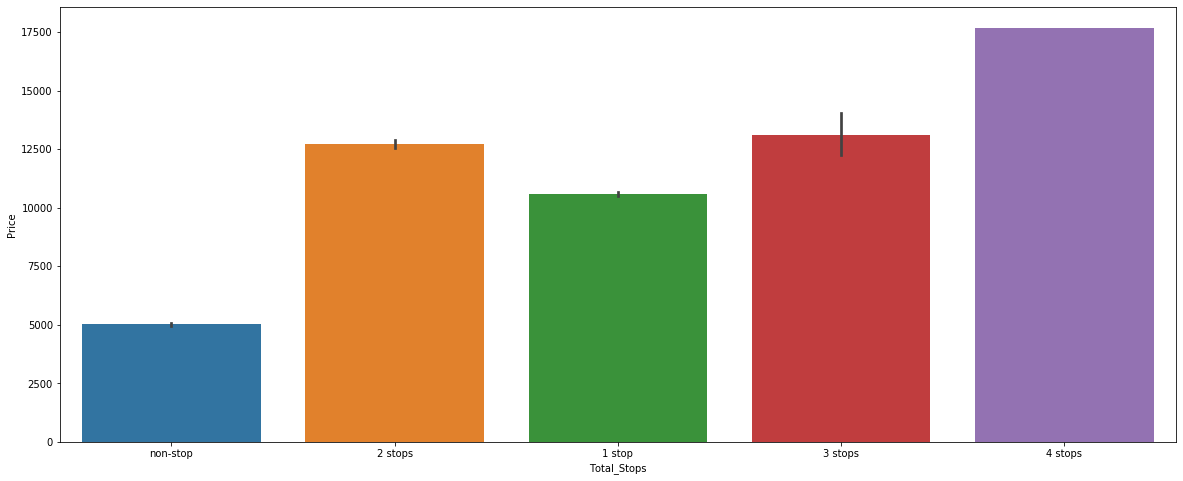

In [18]:
#checking average price with Total_Stops
plt.figure(figsize=(20,8))
sns.barplot(x='Total_Stops',y='Price',data=data_train)
plt.show()

In [19]:
data_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In dataset we can modify some feature to train our model. 

We can convert Date_of_Journey to Date, Month and Day seperately, 

can convert duration to time taken in minutes, 

also can convert dep_time and arrival_time to hours and minute 

#### DATA PREPROCESSING

In [20]:
#Converting to datetime format
data_train['Date_of_Journey'] = pd.to_datetime(data_train['Date_of_Journey'])
data_test['Date_of_Journey'] = pd.to_datetime(data_test['Date_of_Journey'])

In [21]:
#Extracting Day, Month and day_name from the date
#Train
data_train['Day'] = data_train['Date_of_Journey'].dt.day
data_train['Month']= data_train['Date_of_Journey'].dt.month
data_train['Weekday']= data_train['Date_of_Journey'].dt.day_name()

#Test
data_test['Day'] = data_test['Date_of_Journey'].dt.day
data_test['Month']=data_test['Date_of_Journey'].dt.month
data_test['Weekday']=data_test['Date_of_Journey'].dt.day_name()

In [22]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,Thursday


In [23]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Weekday
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,Thursday
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,Thursday
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,Tuesday
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,Tuesday
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,Monday


In [24]:
#Lets extract weekend or weekday from dataset

data_train["IsWeekend"] = ((pd.to_datetime(data_train["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)

data_test["IsWeekend"] = ((pd.to_datetime(data_test["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)

In [25]:
#Converting Duration into minutes
data_train['Duration']=  data_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

data_test['Duration']=  data_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [26]:
#Converting Arrival Time to Hour and Minute

data_train['Arrival_Hour'] = pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train['Arrival_Minutes'] = pd.to_datetime(data_train.Arrival_Time).dt.minute

data_test['Arrival_Hour'] = pd.to_datetime(data_test.Arrival_Time).dt.hour
data_test['Arrival_Minutes'] = pd.to_datetime(data_test.Arrival_Time).dt.minute

In [27]:
#Converting Depart Time to Hour and Minute

data_train['Depar_Hour'] = pd.to_datetime(data_train.Dep_Time).dt.hour
data_train['Depar_Minutes'] = pd.to_datetime(data_train.Dep_Time).dt.minute

data_test['Depar_Hour'] = pd.to_datetime(data_test.Dep_Time).dt.hour
data_test['Depar_Minutes'] = pd.to_datetime(data_test.Dep_Time).dt.minute

In [28]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Weekday,IsWeekend,Arrival_Hour,Arrival_Minutes,Depar_Hour,Depar_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,Sunday,1,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,5,1,Saturday,1,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9,Friday,0,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,5,12,Thursday,0,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,3,1,Thursday,0,21,35,16,50


In [29]:
#Lets drop Date_of_Journey, Arrival_Time, Dep_Time from dataset

data_train.drop(['Dep_Time','Arrival_Time','Date_of_Journey','Route'],inplace=True,axis=1)

data_test.drop(['Dep_Time','Arrival_Time','Date_of_Journey','Route'],inplace=True,axis=1)

In [30]:
data_train.shape,data_test.shape

((10682, 15), (2671, 14))

In [31]:
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Weekday,IsWeekend,Arrival_Hour,Arrival_Minutes,Depar_Hour,Depar_Minutes
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,24,3,Sunday,1,1,10,22,20
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,5,1,Saturday,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,6,9,Friday,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,5,12,Thursday,0,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,3,1,Thursday,0,21,35,16,50


In [32]:
#Checking value count of Additional_Info

data_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [33]:
data_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

As we can see there are some repetate values in train dataset that we can combined or group with other values

In [34]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Weekday', 'IsWeekend',
       'Arrival_Hour', 'Arrival_Minutes', 'Depar_Hour', 'Depar_Minutes'],
      dtype='object')

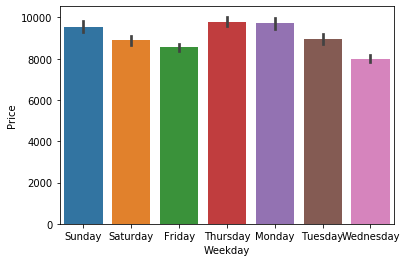

In [35]:
#Plotting data with graphs

sns.barplot(x="Weekday",y="Price",data=data_train)
plt.show()


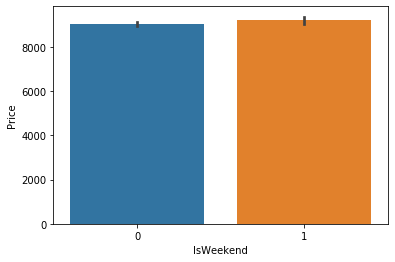

In [36]:
#Plotting prive with isweekend 
sns.barplot(x="IsWeekend",y="Price",data=data_train)
plt.show()


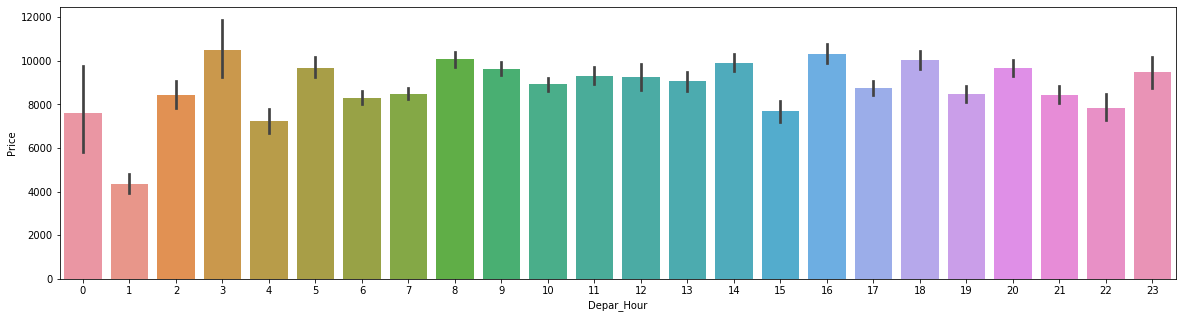

In [37]:
#Plotting data with graphs
plt.figure(figsize=(20,5))
sns.barplot(x="Depar_Hour",y="Price",data=data_train)
plt.show()


We can see average price is almost same for all hour

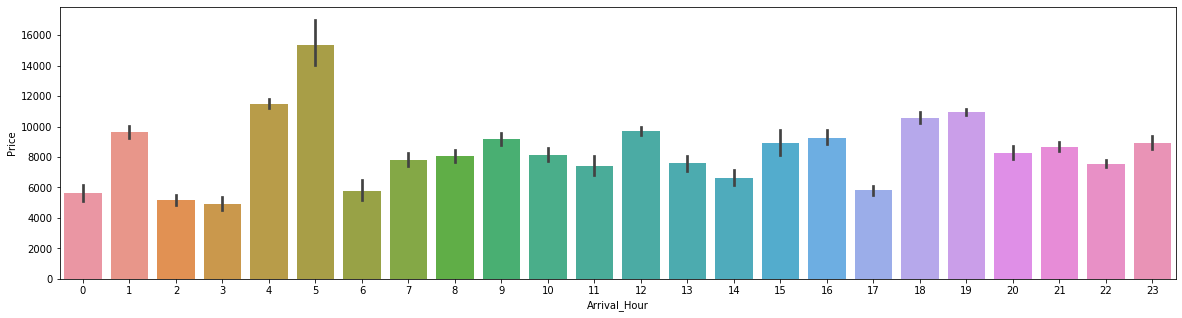

In [38]:
#Plotting data with graphs
plt.figure(figsize=(20,5))
sns.barplot(x="Arrival_Hour",y="Price",data=data_train)
plt.show()

Average price is high for the early morning arrivals and at evenings between 18 to 19 hour. And very low for mid night arrivals 

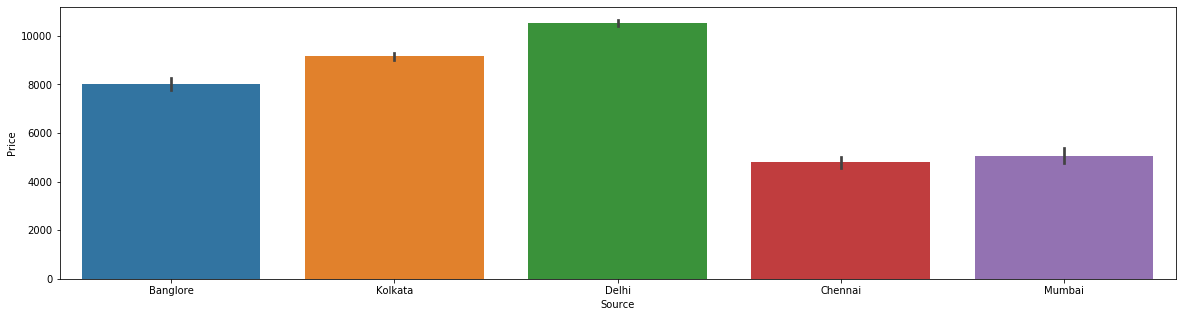

In [39]:
#Plotting data with graphs
plt.figure(figsize=(20,5))
sns.barplot(x="Source",y="Price",data=data_train)
plt.show()

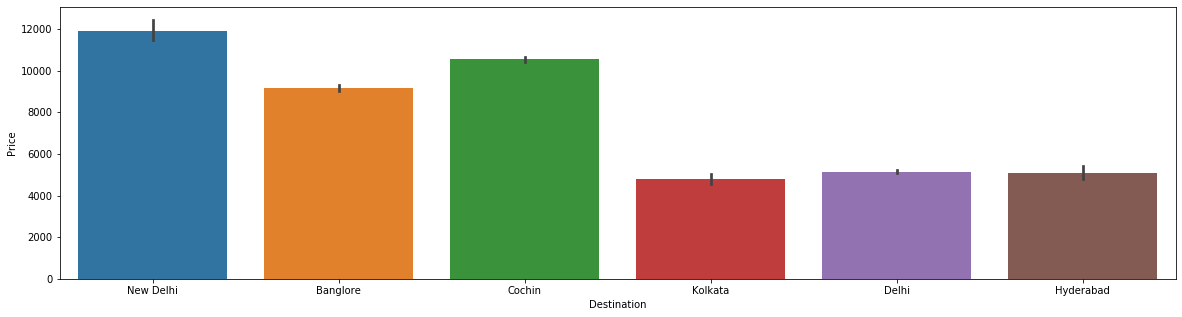

In [40]:
#Plotting data with graphs
plt.figure(figsize=(20,5))
sns.barplot(x="Destination",y="Price",data=data_train)
plt.show()

As we can see, average price is high for the destination New Delhi and Cochin

In [41]:
#Replacing No Info with No info 

data_train["Additional_Info"] = data_train["Additional_Info"].replace({'No Info': 'No info'})

In [42]:
data_train["Additional_Info"].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [43]:
#Encoding Categorical values using label encoder

le = LE()

for col in data_train.columns:
    if data_train[col].dtype == 'object':
        data_train[col] = le.fit_transform(data_train[col])

In [44]:
#Encoding Categorical values using label encoder

le = LE()

for col in data_test.columns:
    if data_test[col].dtype == 'object':
        data_test[col] = le.fit_transform(data_test[col])

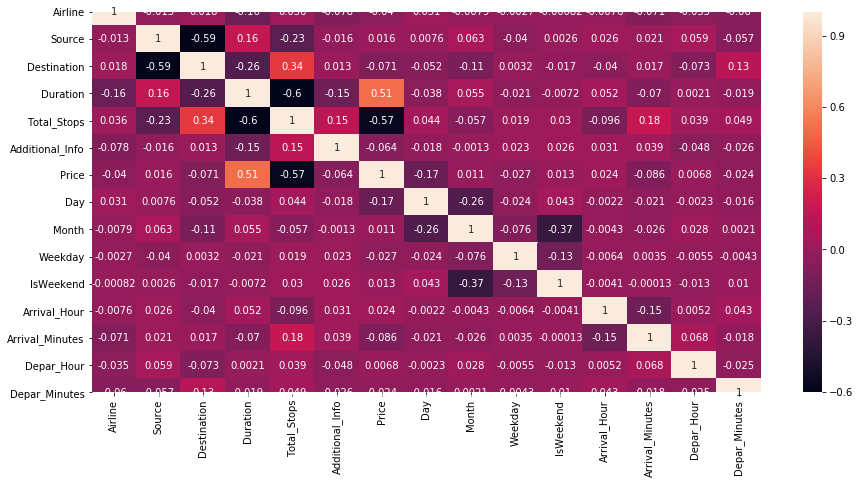

In [45]:
#Lets check for correlation
plt.figure(figsize=(15,7))
sns.heatmap(data_train.corr(),annot=True)

Price is highly correlated with Duration, and moderate correlated with others and negatively correlated with Stops

#### SPLITTING DATA

In [46]:
x = data_train.drop(columns=['Price'])
y = data_train.Price

In [47]:
#Lets scale the data
#Using standard scaler 
ss=SS()
ss.fit(x)
x=ss.transform(x)

### TRAIN TEST SPLIT

In [48]:
#creating a function for testing and training 

def best_model(model):
    i = 0
    max_r2_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        r2_scr=r2_score(test_y,pred_y)
        r2_scr = round(r2_scr*100)
        if r2_scr > max_r2_score:
            max_r2_score = r2_scr
            final_r_state = r_state
    print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)    
    print('MAE:', mean_absolute_error(test_y, pred_y))
    print('MSE:', mean_squared_error(test_y, pred_y))
    print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))
    return max_r2_score

### CROSS VAL SCORE

In [49]:
def cross_val_function(model):
    score = cross_val_score(model,x,y,cv=5,scoring="r2")

    print('Cross Val Score: ', score)
    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    print('Score :', round(score.mean()*100))
    
    r2_score = round(score.mean()*100)
    return r2_score

In [50]:
#Linear Regression

lr = LR()
r2_lr = best_model(lr)

Max R2 Score Corresponding to random state  98  is  47.0
MAE: 2503.2472836711117
MSE: 13228705.92479386
RMSE: 3637.128802337616


In [51]:
r2_lr_cv = cross_val_function(lr)

Cross Val Score:  [0.41775515 0.41473506 0.42591306 0.41374874 0.39469978]
Mean Scores:  0.41337035783230575
Standard deviation:  0.010267831736291642
Score : 41.0


In [52]:
dtr=DTR()
r2_dtr=best_model(dtr)

Max R2 Score Corresponding to random state  98  is  86.0
MAE: 722.3424972703167
MSE: 3627750.6268165396
RMSE: 1904.6654894801186


In [53]:
r2_dtr_cv = cross_val_function(dtr)

Cross Val Score:  [0.77229108 0.79710725 0.74549976 0.81901188 0.77075455]
Mean Scores:  0.7809329054238751
Standard deviation:  0.02508148700398815
Score : 78.0


In [54]:
#Finding best parameters for KNN

neighbors = {"n_neighbors":range(1,30)}
knn = KNR()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 3}

In [55]:
knr = KNR(n_neighbors=3)
r2_knr = best_model(knr)

Max R2 Score Corresponding to random state  51  is  76.0
MAE: 1478.49539853377
MSE: 7138755.533406125
RMSE: 2671.844968070963


In [56]:
r2_knr_cv = cross_val_function(knr)

Cross Val Score:  [0.70509373 0.72435612 0.73619756 0.69216063 0.67060419]
Mean Scores:  0.7056824486764016
Standard deviation:  0.023210118332902985
Score : 71.0


In [57]:
#Finding best parameters for RFR

rfr = RFR() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 100}

In [58]:
rfr=RFR(n_estimators=50)
r2_rfr = best_model(rfr)

Max R2 Score Corresponding to random state  51  is  92.0
MAE: 694.6450927028827
MSE: 2681849.1116889194
RMSE: 1637.6352193601967


In [59]:
r2_rfr_cv = cross_val_function(rfr)

Cross Val Score:  [0.85928643 0.85904681 0.8729562  0.89232573 0.82331607]
Mean Scores:  0.8613862483263122
Standard deviation:  0.022584666443877365
Score : 86.0


In [60]:
#Checking for GBR()

gbr = GBR()
r2_gbr = best_model(gbr)

Max R2 Score Corresponding to random state  75  is  86.0
MAE: 1283.5015232283365
MSE: 4087081.718618027
RMSE: 2021.6532142328533


In [61]:
#Using SVR

svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [62]:
svr=SVR(C=10,kernel="linear")
r2_svr = best_model(svr)

Max R2 Score Corresponding to random state  64  is  45.0
MAE: 2389.032974980008
MSE: 13680225.825483294
RMSE: 3698.6789297644227


Random forest has performed good than other model, we will use Random Forest to Predict our model

In [63]:
#RFR gave max score for random state =51
rfr=RFR(n_estimators=50)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=51)
rfr.fit(train_x,train_y)
pred_y = rfr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print('MAE:', mean_absolute_error(test_y, pred_y))
print('MSE:', mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))

R2 score is :  92.0
MAE: 626.0777470864808
MSE: 1495958.358420244
RMSE: 1223.0937651792049


In [64]:
#Lets predict data with test dataset

pred_test_data = rfr.predict(data_test)

In [65]:
#Adding Price column in dataframe
price_pred_test_data = pd.DataFrame(pred_test_data,columns=["Price"])

In [66]:
#Saving predicted data in csv file
price_pred_test_data.to_csv("Project_17_Flight_Ticket_Price_Prediction.csv",index=False)

### SAVING MODEL

In [67]:
joblib.dump(rfr, 'Project_17_Flight_Ticket_Price.pkl')

['Project_17_Flight_Ticket_Price.pkl']

### CONCLUSION

In this project, two seperate dataset were given for training and testing, after importing dataset I got some features such as Date of Journey, source, destination etc. From the date of journey, I seperated date and month of journey so we can analyze. Also converted arrival and departure time into hours and minutes for analysis, also converted duration to minutes. 

Found that, average flight price was high from the source Delhi. Price was also high for Destination Delhi and Cochin.
Also Average price was high for the early morning arrivals and evenings between 18 to 19 hour. And very low for mid night arrivals.

Applied various algorithm to get the highest accuracy score for training dataset, and got highest r2 score for Random Forest Regressor.